## Introduction to the Project

### Information on Kaggle
Link: https://www.kaggle.com/datasets/mattop/video-games-released-in-2022


## Contents

PASS


## Learning Objectives

PASS


## Contribution & Support
PASS

In [1]:
# Import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set some seaborn settings
sns.set_style("white")

In [2]:
# Load the data via GITHUB raw file link
data_link = "https://raw.githubusercontent.com/muhammadanas0716/Machine-Learning-101/main/Projects/(EDA)%20Video%20Games%20Released%20in%202022/video-games-2022.csv"
df_games = pd.read_csv(data_link)

## Some basic information about our dataset
1. First & last 5 rows of our dataset
2. Some description
3. Some numerical information

In [3]:
df_games.head()

,Month,Day,Title,Platform(s),Genre(s),Developer(s),Publisher(s)
0,JANUARY,3,Freddi Fish 3: The Case of the Stolen Conch Shell,NS,Adventure,Humongous Entertainment,UFO Interactive Games
1,JANUARY,3,Putt-Putt Travels Through Time,NS,Adventure,Humongous Entertainment,UFO Interactive Games
2,JANUARY,4,Deep Rock Galactic,"PS4, PS5",First-person shooter,Ghost Ship Games,Coffee Stain Publishing
3,JANUARY,4,The Pedestrian,"XBO, XSX","Puzzle, platform",Skookum Arts LLC,Skookum Arts LLC
4,JANUARY,6,Demon Gaze Extra,"NS, PS4",Role-playing,Cattle Call,Clouded Leopard Entertainment


In [4]:
df_games.tail()

,Month,Day,Title,Platform(s),Genre(s),Developer(s),Publisher(s)
982,DECEMBER,22,Uta no Prince-sama All Star After Secret,NS,Visual novel,Nippon Ichi Software,Broccoli
983,DECEMBER,22,Valkyrie Profile: Lenneth,"PS4, PS5",Role-playing,tri-Ace,Square Enix
984,DECEMBER,22,Naraka: Bladepoint,XBO,"Action-adventure, battle royale",Thunder Fire Universe X Studio,NetEase Games
985,DECEMBER,23,Sports Story,NS,"Adventure, sports",Sidebar Games,Sidebar Games
986,DECEMBER,28,Hyper Gunsport,"PS4, PS5",Action,Necrosoft Games,Necrosoft Games


In [5]:
# Shape of the dataset
df_games.shape

(987, 7)

Means that there are 987 rows (instances) and 7 columns (features/predicators)

In [6]:
df_games.describe()

,Day
count,987.000000
mean,16.599797
std,8.814457
min,1.000000
25%,10.000000
50%,17.000000
75%,24.000000
max,31.000000


The only numerical column is the ***day*** column.

This shows us that the average day when the game was released was 16th of some month. With ***most*** games being launced before 24th of the month. 

In [7]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Month         987 non-null    object
 1   Day           987 non-null    int64 
 2   Title         987 non-null    object
 3   Platform(s)   987 non-null    object
 4   Genre(s)      987 non-null    object
 5   Developer(s)  987 non-null    object
 6   Publisher(s)  987 non-null    object
dtypes: int64(1), object(6)
memory usage: 54.1+ KB


This shows us the following:
1. No Null/Missing values
2. Only one ***integer*** column, else are ***objects/strings***
3. Memory usage is aout 54 KB (Dunno why knowing this is necessary)

# Column Exploration
1. Some value counts of the columns
2. Basic inferenced made without any relations whatsoever

In [8]:
df_games.head(1)

,Month,Day,Title,Platform(s),Genre(s),Developer(s),Publisher(s)
0,JANUARY,3,Freddi Fish 3: The Case of the Stolen Conch Shell,NS,Adventure,Humongous Entertainment,UFO Interactive Games


<AxesSubplot: >

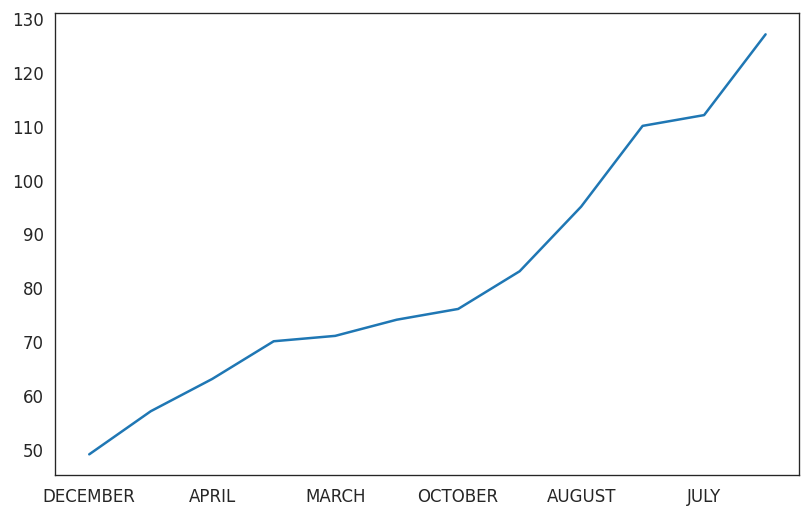

In [9]:
plt.figure(figsize=(8, 5), dpi=120)
df_games["Month"].value_counts(ascending=True).plot()

In [10]:
df_games.sort_values(by="Day", inplace=True)
df_games.reset_index(inplace=True)
df_games.drop("index", axis=1, inplace=True)

<AxesSubplot: >

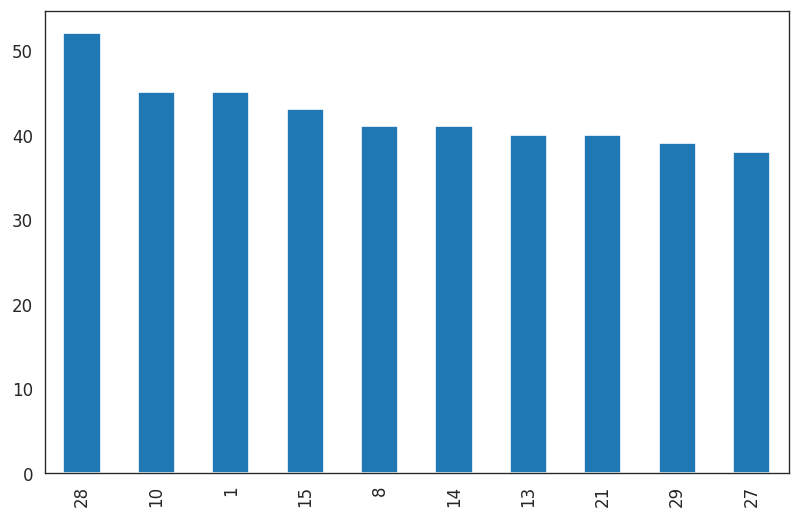

In [11]:
# Top 10 days for the releasing of games
plt.figure(figsize=(8, 5), dpi=120)
df_games["Day"].value_counts(ascending=False).nlargest(10).plot(kind="bar")

In [12]:
df_games["Platform(s)"].value_counts()

NS                                184
Win                               125
Win, NS, PS4, PS5, XBO, XSX        64
Win, PS4, PS5, XBO, XSX            48
PS4, PS5                           35
                                 ... 
NS, iOS, Droid                      1
Win, XSX                            1
Win, PS4, PS5, XBO, XSX, NS         1
Win, NS, PS4, XBO, XSX, Stadia      1
Win, Mac, XSX, iOS, Droid           1
Name: Platform(s), Length: 102, dtype: int64

We have a column by the name of `Platforms(s)`, which in raw shape (as it is) is very useless. Most of them are repetitive. Let's try to extract the possible number of `Platforms`. 

In [15]:
platforms = []
for row in df_games["Platform(s)"]:
    platforms.append(row)

platforms_total = [i.strip() for word in platforms for i in word.split(",")]
platforms_total = np.unique(platforms_total)
platforms_total = pd.DataFrame(platforms_total, columns=["Platform"])
platforms_total.drop(21, axis=0, inplace=True)
platforms_total.drop(0, axis=0, inplace=True)

